<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files

In [24]:
uploaded = files.upload()

Saving mtfuji_data.csv to mtfuji_data.csv


In [28]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [29]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [30]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [31]:
print(fuji[:,3])

[   0.      0.      0.      0.      0.      0.      6.62    7.21   12.2
   54.41  171.56  177.84  228.21  275.38  433.76  371.74  380.06  503.4
  485.39  477.82  580.5   610.92  654.96  628.22  626.64  572.55  723.95
  701.94  879.47  976.17  919.16  817.    743.06  770.92  864.06  826.52
  748.39  756.11  724.5   724.5   724.5   724.5   724.5   724.5   724.5
  724.5   724.5   724.5   852.18  851.36  831.    880.44  955.14  849.52
  831.6   790.01  738.97  848.83  738.3   736.48  672.24  564.02  552.23
  497.41  558.28  503.02  462.33  469.66  429.49  454.21  412.27  362.29
  355.68  368.91  371.04  371.19  377.62  386.64  390.14  418.41  420.6
  443.    458.66  471.82  488.4   505.1   519.54  536.54  553.64  575.07
  588.99  602.36  613.04  631.71  660.43  672.36  700.15  725.72  741.17
  753.68  772.58  795.25  817.62  858.62  883.89  910.5   932.74  973.32
 1000.24 1034.34 1059.69 1105.8  1166.58 1219.86 1239.97 1292.52 1360.1
 1429.75 1506.66 1561.94 1598.36 1659.43 1726.5  1781.98

[Problem 1] Data visualization

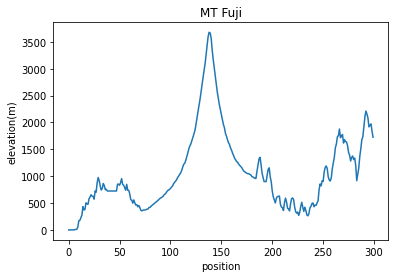

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
position = fuji[:,0]
elevation = fuji[:,3]
ax.plot(position, elevation )
ax.set_title('MT Fuji')
ax.set_xlabel('position')
ax.set_ylabel('elevation(m)')
plt.show()


[Problem 2] Create a function that calculates the slope of a point

In [33]:
def fuji_gradient(position, elevation,current_point):
  x1 = position[current_point]
  x2 = position[current_point-1]
  y1 = elevation[current_point]
  y2 = elevation[current_point-1]

  y_change = y1-y2
  x_change = x1-x2

  gradient = y_change/x_change

  return gradient

[Problem 3] Create a function to calculate the destination point

In [34]:
def destination_point(current_point,slope_current_point, Alpha=0.2):
  destination_point = int(current_point - (Alpha*slope_current_point))

  return destination_point

#[Problem 4,5] 
1.Create a function to go down the mountain

2.Visualization of the descent process

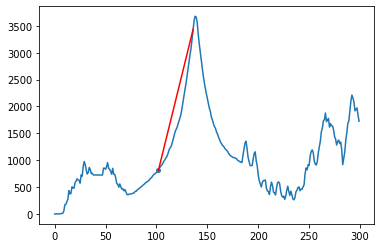

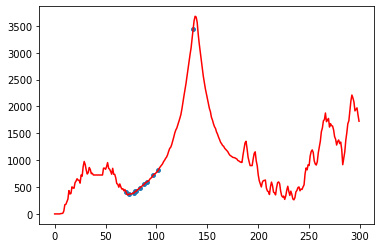

In [35]:
def compute_path(elevation, current_point, position, alpha=0.2):
    grad = elevation[current_point]-elevation[current_point-1]
    update_y = [elevation[current_point]]
    update_point = [current_point]
    fig, ax = plt.subplots()
    ax.plot(position, elevation)

    while grad > 0:
        grad = fuji_gradient(position, elevation, current_point)
        current_point = destination_point(current_point,grad,alpha)

        update_y.append(elevation[current_point])
        update_point.append(current_point)  

        ax.scatter(current_point, elevation[current_point], s=15)
        ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
        plt.pause(1)
        plt.show()
    return update_y, update_point

path = []
path_index = []
current_point = int(position[136])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

#[Problem 6,7] 
1. Change of initial value

  2.Visualization of the descent process for each initial value


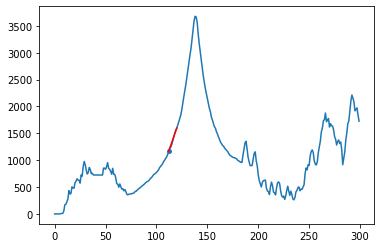

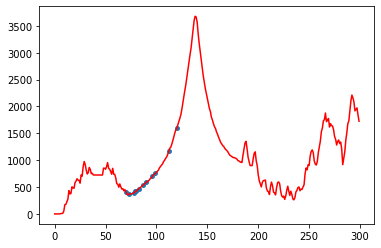

In [37]:
path = []
path_index = []
current_point = int(position[120])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

#[Problem 8] (Advance problem) Hyperparameter changes

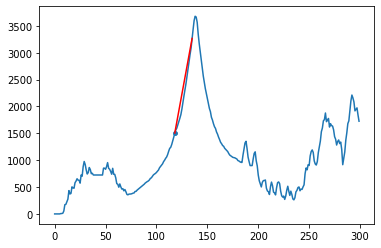

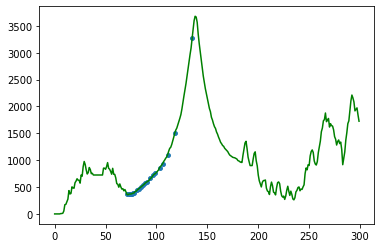

In [38]:
path = []
path_index = []
current_point = int(position[135])
alpha = 0.09

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='green')
ax.scatter(path_index, path, s=15)
plt.show()